# Homework 4: Distributions from Distributions

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

***
## Problem 2: Does changing the number of samples collected (n) change the t distribution?

- Collect 6 samples from your normal distributions and the calculate t for each iteration.

In [1]:
using Random, Distributions
using Statistics

#Random.seed!(123)
μ = 12
σ = 2
N = 50000
norm_data = rand(Normal(μ, σ), N);

rand_collection(data, s) = rand(data, (1, s));

function t_value(collct, μ)
    n = length(collct)
    X = mean(collct)
    S = std(collct, corrected=true, mean=X)
    return sqrt(n)*(X - μ)/S
end

function t_distribution(data, s, L)
    μ = mean(data)
    dist = [t_value(rand_collection(data, s), μ) for j in range(1, L)]
    return dist
end;

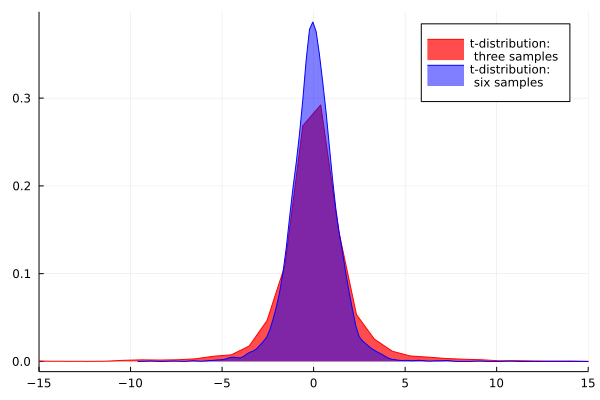

In [2]:
using StatsPlots

t_dist1 = t_distribution(norm_data, 3, 5000)
t_dist2 = t_distribution(norm_data, 6, 5000)

denst1 = density(t_dist1, color=:red, fill=(0, .7, :red), label="t-distribution:\n three samples")
density!(denst1, t_dist2, color=:blue, fill=(0, .5, :blue), label="t-distribution:\n six samples", xlim=(-15, 15))

 How do the density plots compare to the answer in Problem 1?
<div class="alert alert-block alert-info">
<b>Comments: The area under the curve in both cases appears to be the same. Nevertheless the shape of the density curve is noticeably longer as the number of elements in the sample increases (from three to six in this case)</b>.
</div>